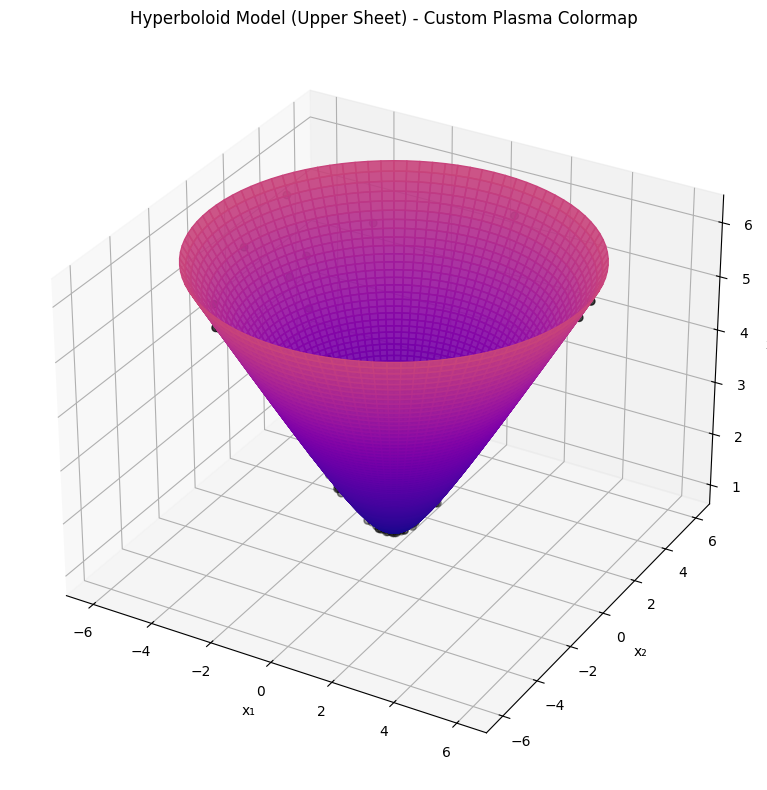

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Create a meshgrid in hyperbolic polar coordinates
theta = np.linspace(0, 2 * np.pi, 100)
r = np.linspace(0, 2.5, 100)
theta, r = np.meshgrid(theta, r)

# Parametrize the hyperboloid model (upper sheet)
x0 = np.cosh(r)  # height
x1 = np.sinh(r) * np.cos(theta)
x2 = np.sinh(r) * np.sin(theta)

# Create a truncated plasma colormap (keeping purples and blues)
plasma = plt.cm.plasma(np.linspace(0, 0.5, 256))  # 0.5 to 1 is yellow-orange
custom_cmap = ListedColormap(plasma)

# Generate color values based on height (x0)
norm = plt.Normalize(x0.min(), x0.max())
colors = custom_cmap(norm(x0))

# Plotting the hyperboloid
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, x0, facecolors=colors, rstride=1, cstride=1, antialiased=True, shade=False, alpha=0.9)

# Add black points (dots) on the hyperboloid
num_points = 100
rand_r = np.random.uniform(0, 2.5, num_points)
rand_theta = np.random.uniform(0, 2 * np.pi, num_points)

px0 = np.cosh(rand_r)
px1 = np.sinh(rand_r) * np.cos(rand_theta)
px2 = np.sinh(rand_r) * np.sin(rand_theta)

ax.scatter(px1, px2, px0, color='black', s=30)

# Labels and view
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('x₀')
ax.set_title('Hyperboloid Model (Upper Sheet) - Custom Plasma Colormap')

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import animation

# Create a meshgrid in hyperbolic polar coordinates
theta = np.linspace(0, 2 * np.pi, 100)
r = np.linspace(0, 2.5, 100)
theta, r = np.meshgrid(theta, r)

# Parametrize the hyperboloid model (upper sheet)
x0 = np.cosh(r)  # height
x1 = np.sinh(r) * np.cos(theta)
x2 = np.sinh(r) * np.sin(theta)

# Create a truncated plasma colormap (keeping purples and blues)
plasma = plt.cm.plasma(np.linspace(0, 0.5, 256))  # 0.5 to 1 is yellow-orange
custom_cmap = ListedColormap(plasma)

# Generate color values based on height (x0)
norm = plt.Normalize(x0.min(), x0.max())
colors = custom_cmap(norm(x0))

# Random black points on the hyperboloid
num_points = 100
rand_r = np.random.uniform(0, 2.5, num_points)
rand_theta = np.random.uniform(0, 2 * np.pi, num_points)

px0 = np.cosh(rand_r)
px1 = np.sinh(rand_r) * np.cos(rand_theta)
px2 = np.sinh(rand_r) * np.sin(rand_theta)

# Set up the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.clear()
    ax.plot_surface(x1, x2, x0, facecolors=colors, rstride=1, cstride=1, antialiased=True, shade=False, alpha=0.9)
    ax.scatter(px1, px2, px0, color='black', s=30)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_zlabel('x₀')
    ax.set_title('Hyperboloid Model (Upper Sheet) - Custom Plasma Colormap')
    return fig,

# Update function for rotation
def update(frame):
    ax.view_init(elev=30, azim=frame)
    return fig,

# Create the animation
ani = animation.FuncAnimation(fig, update, init_func=init, frames=np.linspace(0, 360, 120), interval=50, blit=False)

# Save as GIF
ani.save("hyperboloid_rotation.gif", writer='pillow', fps=20)

plt.close()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Create a meshgrid in hyperbolic polar coordinates
theta = np.linspace(0, 2 * np.pi, 100)
r = np.linspace(0, 2.5, 100)
theta, r = np.meshgrid(theta, r)

# Parametrize the hyperboloid model (upper sheet)
x0 = np.cosh(r)
x1 = np.sinh(r) * np.cos(theta)
x2 = np.sinh(r) * np.sin(theta)

# Custom truncated plasma colormap (cooler range)
plasma = plt.cm.plasma(np.linspace(0, 0.5, 256))
custom_cmap = ListedColormap(plasma)

# Normalize for coloring
norm = plt.Normalize(x0.min(), x0.max())
colors = custom_cmap(norm(x0))

# Random black points on the hyperboloid
num_points = 100
rand_r = np.random.uniform(0, 2.5, num_points)
rand_theta = np.random.uniform(0, 2 * np.pi, num_points)

px0 = np.cosh(rand_r)
px1 = np.sinh(rand_r) * np.cos(rand_theta)
px2 = np.sinh(rand_r) * np.sin(rand_theta)

# Create and save each frame
for i, angle in enumerate(np.linspace(0, 360, 120)):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface with transparency
    ax.plot_surface(x1, x2, x0, facecolors=colors, rstride=1, cstride=1,
                    antialiased=True, shade=False, alpha=0.9)

    # Add black points
    ax.scatter(px1, px2, px0, color='black', s=30)

    # View angle
    ax.view_init(elev=30, azim=angle)

    # Hide everything else
    ax.set_axis_off()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.patch.set_alpha(0)  # Axis background transparent

    # Save frame with transparent background
    plt.savefig(f"frame_{i:03d}.png", dpi=150, transparent=True)
    plt.close()
